In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Part 2 - Data Analysis

In [2]:
donation = pd.read_csv("tdp_finance_test_data_takehome.csv")
donation.head()

,first_name,last_name,email,county,birthdate,donation_amount,donation_date
0,Peter,Hayes,NaN,HARRIS,08/01/1985,$60,11/07/2019
1,Gary,Graves,NaN,TRAVIS,12/01/2000,$25,05/11/2019
2,Steven,Wires,ahisbrw4iv9p5s3@outlook.com,RANDALL,01/30/1999,$86,06/02/2019
3,George,Laughlin,7kw0anwor5uxf5q12m2w@verizon.com,TARRANT,12/23/1975,290,08/12/2019
4,Lane,Hagemann,ektaztj4fto@gmail.com,BEXAR,10/21/1993,$73,04/26/2019


In [3]:
donation['donation_amount'] = donation['donation_amount'].str.strip('$')
donation.head()

,first_name,last_name,email,county,birthdate,donation_amount,donation_date
0,Peter,Hayes,NaN,HARRIS,08/01/1985,60,11/07/2019
1,Gary,Graves,NaN,TRAVIS,12/01/2000,25,05/11/2019
2,Steven,Wires,ahisbrw4iv9p5s3@outlook.com,RANDALL,01/30/1999,86,06/02/2019
3,George,Laughlin,7kw0anwor5uxf5q12m2w@verizon.com,TARRANT,12/23/1975,290,08/12/2019
4,Lane,Hagemann,ektaztj4fto@gmail.com,BEXAR,10/21/1993,73,04/26/2019


In [4]:
donation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12378 entries, 0 to 12377
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   first_name       12378 non-null  object
 1   last_name        12378 non-null  object
 2   email            9304 non-null   object
 3   county           12378 non-null  object
 4   birthdate        12378 non-null  object
 5   donation_amount  12378 non-null  object
 6   donation_date    12378 non-null  object
dtypes: object(7)
memory usage: 677.0+ KB


### Donations & Aggregations
* 1)	Please identify the 3 largest donations, along with who gave them and when.
* 2)	What proportion of donors have donated more than once? What proportion of donors have given more than twice?
* 3)	Please identify the 5 donors who have given TDP the most, cumulatively.
* 4)	In terms of total dollars donated, which 3 counties accounted for the most dollars donated? 
* 5)	Which counties had the a) the largest and b) the smallest average donation size?


In [5]:
donation['donation_amount'] = donation['donation_amount'].astype(str).astype(int)

In [6]:
# Question 1
# The largest donation is $300, and there are more than 3 people donate $300
# However, nlargest function just shows the top 3 index of $300

donation.nlargest(3, columns = 'donation_amount')

,first_name,last_name,email,county,birthdate,donation_amount,donation_date
117,Samuel,Sanabria,NaN,LUBBOCK,08/04/1976,300,01/01/2019
695,Jeffery,Tong,el86tuv5dpc@gmail.org,RANDALL,07/20/1983,300,10/16/2019
906,Josephine,Hardison,NaN,HARRIS,03/20/1975,300,04/27/2019


In [7]:
donation.nlargest(10, columns = 'donation_amount')

,first_name,last_name,email,county,birthdate,donation_amount,donation_date
117,Samuel,Sanabria,NaN,LUBBOCK,08/04/1976,300,01/01/2019
695,Jeffery,Tong,el86tuv5dpc@gmail.org,RANDALL,07/20/1983,300,10/16/2019
906,Josephine,Hardison,NaN,HARRIS,03/20/1975,300,04/27/2019
1323,Jonathan,Clayton,NaN,DENTON,07/26/1984,300,01/02/2019
1379,David,Green,NaN,MONTGOMERY,05/23/1969,300,07/09/2019
1989,John,Rogers,NaN,BEXAR,02/17/1970,300,04/09/2019
2405,Betsy,Thomson,NaN,TARRANT,10/22/1981,300,08/26/2019
2419,Hee,Ward,NaN,TRAVIS,06/17/1979,300,04/07/2019
3130,Vincent,Florence,q8axtnciyz7vbnhxkozv@gmail.com,TARRANT,07/21/1974,300,02/04/2019
4529,Neva,Hart,NaN,COLLIN,09/08/1981,300,01/26/2019


In [8]:
donation['donation_amount'].max()

300

In [9]:
# Question 2
# There are 86% of donors have donated at least once.


In [10]:
donation['Name'] = donation['first_name'].str.cat(donation['last_name'],sep=" ")
donation.head()

,first_name,last_name,email,county,birthdate,donation_amount,donation_date,Name
0,Peter,Hayes,NaN,HARRIS,08/01/1985,60,11/07/2019,Peter Hayes
1,Gary,Graves,NaN,TRAVIS,12/01/2000,25,05/11/2019,Gary Graves
2,Steven,Wires,ahisbrw4iv9p5s3@outlook.com,RANDALL,01/30/1999,86,06/02/2019,Steven Wires
3,George,Laughlin,7kw0anwor5uxf5q12m2w@verizon.com,TARRANT,12/23/1975,290,08/12/2019,George Laughlin
4,Lane,Hagemann,ektaztj4fto@gmail.com,BEXAR,10/21/1993,73,04/26/2019,Lane Hagemann


In [11]:
donation.groupby(['Name'])['Name'].count()

Name
Aaron Adcock       1
Aaron Amrhein      1
Aaron Baker        1
Aaron Brenneman    1
Aaron Castle       1
                  ..
Zoe Reid           1
Zoila Glass        1
Zoila Gran         1
Zona Douglas       1
Zoraida Tinsley    1
Name: Name, Length: 10622, dtype: int64

In [12]:
len(donation.groupby(['Name'])['Name'].count())/donation.shape[0]

0.8581354015188237

In [13]:
# Question 3
# The top 5 donors are Samuel Sanabria, Neva Hart, Jeffery Tong, Stacey Presha and Betsy Thomson

top5 = donation.groupby(['Name']).sum()
top5

,donation_amount
Name,
Aaron Adcock,40
Aaron Amrhein,108
Aaron Baker,108
Aaron Brenneman,45
Aaron Castle,58
...,...
Zoe Reid,5
Zoila Glass,4
Zoila Gran,60


In [14]:
top5.nlargest(5, columns = 'donation_amount')

,donation_amount
Name,
Samuel Sanabria,890
Neva Hart,860
Jeffery Tong,810
Stacey Presha,810
Betsy Thomson,780


In [15]:
# Question 4
# The top 3 counties are HARRIS, DALLAS and TARRANT

top3 = donation.groupby(['county']).sum()
top3

,donation_amount
county,
ANDERSON,1176
ANDREWS,463
ANGELINA,3053
ARANSAS,634
ARCHER,55
...,...
WOOD,1750
YOAKUM,549
YOUNG,655


In [16]:
top3.nlargest(3, columns = 'donation_amount')

,donation_amount
county,
HARRIS,138655
DALLAS,78355
TARRANT,74244


In [17]:
# Question 5
# GARZA has the largest average donation
# TERRELL has the smallest average donation

m = donation.groupby(['county']).mean()
m

,donation_amount
county,
ANDERSON,56.000000
ANDREWS,77.166667
ANGELINA,74.463415
ARANSAS,63.400000
ARCHER,27.500000
...,...
WOOD,76.086957
YOAKUM,91.500000
YOUNG,81.875000


In [18]:
m.nlargest(1, columns = 'donation_amount')

,donation_amount
county,
GARZA,171.0


In [19]:
m.nsmallest(1, columns = 'donation_amount')

,donation_amount
county,
TERRELL,4.0


### Situational Analysis

* A)	If you were told that 100% of the donations in this dataset were acquired through online advertisements and it cost $5 per click, that 2/3rds of people who clicked the ad entered donor info, and that 10% of those who entered their donor info actually become donors, would you advise the finance team to continue paying for these ads? Why or why not?

* B)	If you were told that it cost a flat rate of $10,000 per year to advertise in an entire county on a local newspaper website and that 100% of donations in this dataset were identified through this method, how many counties would it make sense to advertise in?


In [20]:
# Question A
# Even though the profit is positive, the risk of cost still is very high. 
# Besides, the proportion of profit based on the total amount donated has only 2%.

In [21]:
print("Number of people donated: ", donation.shape[0])
print("Total Cost: ", donation.shape[0]/(2/3)/(1/10)*5)
print("Total Amount Donate: ", donation['donation_amount'].sum())

Number of people donated:  12378
Total Cost:  928350.0
Total Amount Donate:  951200


In [22]:
print("Profit: ", -donation.shape[0]/(2/3)/(1/10)*5 + donation['donation_amount'].sum())

Profit:  22850.0


In [23]:
(-donation.shape[0]/(2/3)/(1/10)*5 + donation['donation_amount'].sum())/(donation['donation_amount'].sum())

0.02402228763666947

In [24]:
# Question B


In [25]:
donation.groupby(['county']).sum()>10000

,donation_amount
county,
ANDERSON,False
ANDREWS,False
ANGELINA,False
ARANSAS,False
ARCHER,False
...,...
WOOD,False
YOAKUM,False
YOUNG,False


### Email String Cleaning & Proportions
* 1)	What proportion of folks do we have email addresses for?
* 2)	What were the two most frequent email domains used (e.g. my_fake_email@<EMAIL_DOMAIN>.com)? Among emails we collected, what proportion of emails had these 2 most popular email domains?



In [26]:
# Question 1

num_email = donation['email'].notnull().sum()
total = donation.shape[0]

print("Number of email: ", num_email)
print("Proportion of email that we have: ", num_email/total)

Number of email:  9304
Proportion of email that we have:  0.7516561641622233


In [27]:
# Question 2


In [28]:
emails = donation['email'].dropna()
emails

2             ahisbrw4iv9p5s3@outlook.com
3        7kw0anwor5uxf5q12m2w@verizon.com
4                   ektaztj4fto@gmail.com
6        u60wlhtcgm4gctbu4gz4@hotmail.com
7              w80r46p4f1yknetx@gmail.com
                       ...               
12371                    6f70qf@yahoo.gov
12373           2pbm50ppvmwu@frontier.org
12374                  exqjdp@verizon.gov
12375                  96j1hxb5@yahoo.com
12377        2yu86tsbln7c5imn@verizon.com
Name: email, Length: 9304, dtype: object

In [29]:
col_one_list = emails.tolist()
col_one_list

['ahisbrw4iv9p5s3@outlook.com',
 '7kw0anwor5uxf5q12m2w@verizon.com',
 'ektaztj4fto@gmail.com',
 'u60wlhtcgm4gctbu4gz4@hotmail.com',
 'w80r46p4f1yknetx@gmail.com',
 'dmg6lb1egcgenryak1@gmail.com',
 'napee2l4zu3rc@gmail.com',
 '7spo1oe2qjfk986jrvt@charter.com',
 'f4mi3r6yrgcituohcva@verizon.com',
 'bzy8mz37fbygr9n2u@verizon.com',
 '2hx9ugocw@gmail.net',
 '2zp6m5ajej2jo0f1dek@charter.com',
 'x83oz7flhj8f0w1gaapr@charter.com',
 'fr59z@hotmail.com',
 'whxf3ib@hotmail.com',
 'mouf4yjbx62w3f2f4u@yahoo.org',
 'pv60w95pbj6pfc@gmail.com',
 'hkc5leo02i5v02717it7@outlook.com',
 'ahvkxbp4rx8tx2o@gmail.gov',
 'n9lh8hy306r@yahoo.com',
 '94slf@gmail.com',
 'dw7pwc7yjvn@gmail.com',
 'l1fhgrqm3e7n7b71djp@gmail.com',
 'agybbyclqmnkxayigrd@hotmail.gov',
 'lkec3qpne@charter.com',
 'fjbmynqvhx@gmail.com',
 'vag27d4wm2mzm9fru7@gmail.com',
 '17n8bqtiixa4uee@gmail.com',
 'wfvv5p5827@frontier.com',
 'tq4bj61o75b61zj4rpvq@gmail.com',
 'i7c4l0wi35mobdo4n@charter.com',
 'uk97d7rcgs@gmail.com',
 'tme7k@gmail.com',


In [30]:
for i in range(len(col_one_list)):
    mail = col_one_list[i].split('@')[1]
    domain = mail.split('.')[0]
    print(domain)

outlook
verizon
gmail
hotmail
gmail
gmail
gmail
charter
verizon
verizon
gmail
charter
charter
hotmail
hotmail
yahoo
gmail
outlook
gmail
yahoo
gmail
gmail
gmail
hotmail
charter
gmail
gmail
gmail
frontier
gmail
charter
gmail
gmail
frontier
gmail
gmail
comcast
frontier
frontier
comcast
gmail
gmail
yahoo
gmail
gmail
yahoo
gmail
yahoo
frontier
gmail
gmail
charter
hotmail
frontier
gmail
yahoo
charter
outlook
hotmail
gmail
gmail
gmail
outlook
yahoo
gmail
outlook
charter
comcast
yahoo
gmail
gmail
yahoo
gmail
yahoo
gmail
gmail
yahoo
gmail
hotmail
gmail
gmail
yahoo
yahoo
gmail
hotmail
comcast
comcast
gmail
gmail
yahoo
yahoo
gmail
comcast
gmail
verizon
hotmail
outlook
hotmail
verizon
gmail
yahoo
outlook
yahoo
gmail
yahoo
gmail
yahoo
gmail
gmail
outlook
yahoo
hotmail
gmail
gmail
yahoo
gmail
gmail
yahoo
frontier
comcast
verizon
yahoo
comcast
gmail
yahoo
gmail
gmail
frontier
gmail
outlook
gmail
frontier
charter
gmail
gmail
yahoo
gmail
outlook
outlook
yahoo
gmail
gmail
gmail
yahoo
verizon
gmail
yahoo

gmail
comcast
outlook
gmail
gmail
comcast
comcast
outlook
gmail
outlook
outlook
verizon
gmail
gmail
gmail
yahoo
comcast
gmail
gmail
gmail
gmail
yahoo
gmail
gmail
yahoo
gmail
yahoo
charter
yahoo
yahoo
outlook
yahoo
gmail
gmail
frontier
verizon
gmail
charter
yahoo
verizon
outlook
frontier
hotmail
gmail
gmail
comcast
yahoo
charter
yahoo
comcast
frontier
verizon
hotmail
gmail
charter
gmail
comcast
outlook
frontier
comcast
gmail
charter
yahoo
outlook
comcast
hotmail
gmail
gmail
gmail
hotmail
yahoo
gmail
outlook
hotmail
yahoo
gmail
hotmail
yahoo
gmail
frontier
gmail
gmail
verizon
yahoo
verizon
gmail
gmail
yahoo
outlook
gmail
gmail
yahoo
yahoo
gmail
gmail
frontier
hotmail
gmail
hotmail
frontier
yahoo
hotmail
comcast
frontier
gmail
comcast
yahoo
charter
gmail
gmail
hotmail
outlook
gmail
frontier
gmail
gmail
gmail
yahoo
comcast
yahoo
outlook
hotmail
charter
gmail
yahoo
verizon
charter
yahoo
hotmail
gmail
outlook
gmail
gmail
outlook
yahoo
gmail
yahoo
yahoo
yahoo
outlook
gmail
outlook
yahoo
front

yahoo
comcast
frontier
yahoo
gmail
outlook
verizon
gmail
yahoo
gmail
verizon
yahoo
frontier
yahoo
outlook
gmail
gmail
verizon
gmail
gmail
comcast
comcast
hotmail
gmail
outlook
gmail
yahoo
verizon
gmail
yahoo
charter
yahoo
gmail
gmail
charter
gmail
gmail
gmail
hotmail
yahoo
comcast
hotmail
gmail
yahoo
gmail
gmail
gmail
gmail
yahoo
gmail
yahoo
gmail
gmail
verizon
charter
gmail
verizon
outlook
outlook
yahoo
gmail
gmail
gmail
yahoo
gmail
gmail
gmail
gmail
hotmail
gmail
charter
charter
frontier
gmail
yahoo
yahoo
gmail
hotmail
comcast
frontier
comcast
gmail
gmail
yahoo
gmail
gmail
yahoo
gmail
gmail
charter
gmail
yahoo
gmail
hotmail
yahoo
yahoo
gmail
hotmail
yahoo
yahoo
yahoo
gmail
hotmail
charter
outlook
gmail
verizon
outlook
yahoo
gmail
gmail
gmail
charter
gmail
gmail
yahoo
frontier
outlook
yahoo
yahoo
charter
yahoo
gmail
frontier
gmail
yahoo
gmail
comcast
outlook
yahoo
frontier
yahoo
comcast
gmail
gmail
comcast
hotmail
gmail
gmail
gmail
hotmail
yahoo
gmail
gmail
gmail
outlook
gmail
outlook

charter
comcast
gmail
gmail
charter
comcast
charter
gmail
gmail
outlook
gmail
gmail
frontier
outlook
gmail
gmail
gmail
gmail
comcast
charter
gmail
gmail
yahoo
outlook
gmail
gmail
verizon
yahoo
outlook
comcast
gmail
gmail
gmail
hotmail
verizon
outlook
verizon
charter
yahoo
hotmail
yahoo
yahoo
gmail
gmail
gmail
gmail
hotmail
verizon
gmail
yahoo
frontier
yahoo
verizon
gmail
charter
yahoo
yahoo
gmail
gmail
yahoo
outlook
gmail
comcast
yahoo
hotmail
gmail
gmail
hotmail
charter
gmail
hotmail
charter
comcast
gmail
charter
gmail
gmail
comcast
gmail
comcast
gmail
gmail
yahoo
charter
frontier
gmail
charter
gmail
verizon
gmail
verizon
outlook
verizon
gmail
comcast
charter
gmail
frontier
yahoo
verizon
gmail
gmail
gmail
gmail
gmail
verizon
verizon
verizon
yahoo
gmail
charter
yahoo
gmail
yahoo
frontier
outlook
yahoo
verizon
gmail
gmail
yahoo
gmail
gmail
verizon
hotmail
gmail
yahoo
verizon
yahoo
frontier
outlook
yahoo
verizon
hotmail
gmail
hotmail
gmail
gmail
yahoo
hotmail
gmail
hotmail
gmail
gmail
ou

comcast
gmail
yahoo
gmail
outlook
outlook
gmail
frontier
gmail
outlook
gmail
verizon
gmail
gmail
outlook
gmail
gmail
hotmail
frontier
gmail
verizon
yahoo
yahoo
gmail
hotmail
yahoo
charter
yahoo
gmail
yahoo
yahoo
gmail
outlook
yahoo
gmail
yahoo
gmail
frontier
gmail
outlook
frontier
gmail
yahoo
comcast
verizon
gmail
gmail
gmail
verizon
frontier
yahoo
comcast
frontier
gmail
gmail
gmail
gmail
gmail
gmail
outlook
hotmail
gmail
hotmail
verizon
charter
gmail
gmail
outlook
gmail
gmail
outlook
gmail
comcast
yahoo
gmail
gmail
yahoo
gmail
gmail
gmail
frontier
gmail
gmail
frontier
yahoo
gmail
verizon
hotmail
comcast
yahoo
yahoo
gmail
outlook
gmail
hotmail
yahoo
hotmail
yahoo
gmail
frontier
yahoo
gmail
gmail
gmail
gmail
gmail
gmail
yahoo
yahoo
frontier
hotmail
outlook
gmail
frontier
yahoo
gmail
yahoo
gmail
hotmail
gmail
gmail
charter
gmail
gmail
verizon
charter
comcast
gmail
comcast
yahoo
gmail
frontier
outlook
outlook
comcast
gmail
frontier
frontier
gmail
gmail
comcast
gmail
hotmail
charter
yahoo


yahoo
gmail
verizon
gmail
charter
gmail
comcast
frontier
gmail
yahoo
gmail
gmail
gmail
yahoo
gmail
yahoo
verizon
yahoo
yahoo
gmail
gmail
gmail
yahoo
yahoo
comcast
yahoo
gmail
verizon
frontier
verizon
frontier
charter
comcast
gmail
gmail
comcast
gmail
charter
gmail
gmail
comcast
yahoo
gmail
verizon
yahoo
gmail
gmail
verizon
verizon
gmail
gmail
gmail
comcast
gmail
yahoo
gmail
verizon
yahoo
charter
gmail
yahoo
yahoo
gmail
frontier
gmail
gmail
gmail
verizon
gmail
gmail
frontier
comcast
yahoo
frontier
gmail
gmail
charter
yahoo
verizon
gmail
outlook
yahoo
outlook
gmail
charter
gmail
outlook
comcast
outlook
gmail
charter
charter
outlook
charter
frontier
outlook
gmail
hotmail
frontier
gmail
gmail
comcast
hotmail
gmail
gmail
gmail
hotmail
yahoo
gmail
gmail
frontier
verizon
gmail
yahoo
verizon
frontier
gmail
yahoo
yahoo
yahoo
charter
hotmail
hotmail
yahoo
comcast
gmail
gmail
yahoo
verizon
gmail
gmail
gmail
gmail
verizon
yahoo
gmail
yahoo
hotmail
yahoo
gmail
outlook
gmail
frontier
gmail
comcast
y

gmail
gmail
verizon
frontier
gmail
frontier
gmail
yahoo
outlook
yahoo
gmail
yahoo
comcast
gmail
gmail
comcast
charter
gmail
outlook
gmail
yahoo
gmail
outlook
yahoo
gmail
verizon
frontier
frontier
gmail
yahoo
yahoo
gmail
outlook
outlook
outlook
gmail
charter
charter
comcast
charter
gmail
outlook
hotmail
hotmail
gmail
gmail
yahoo
gmail
gmail
gmail
gmail
frontier
gmail
gmail
gmail
gmail
yahoo
yahoo
verizon
gmail
frontier
gmail
gmail
gmail
gmail
yahoo
yahoo
verizon
gmail
gmail
comcast
gmail
gmail
hotmail
comcast
yahoo
gmail
gmail
gmail
frontier
hotmail
gmail
hotmail
gmail
yahoo
gmail
yahoo
verizon
hotmail
frontier
gmail
yahoo
yahoo
outlook
yahoo
gmail
gmail
comcast
gmail
gmail
yahoo
comcast
gmail
outlook
gmail
yahoo
verizon
gmail
charter
gmail
outlook
yahoo
verizon
gmail
gmail
outlook
frontier
gmail
gmail
gmail
gmail
charter
yahoo
frontier
charter
gmail
frontier
hotmail
hotmail
gmail
charter
gmail
gmail
hotmail
yahoo
gmail
gmail
yahoo
gmail
gmail
hotmail
hotmail
outlook
gmail
yahoo
gmail
g

### Date Manipulation & Analysis
* 1)	On which date(s) did we receive the most donations?
* 2)	Did you notice any meaningful seasonal effects for donations in this dataset? For example were donors more likely to give in the summer months than in winter months? Did we see an increase in donations near the end of the year?
* 3)	We want to get a sense of how old our voters are so we can target our messaging. Please present some summary statistics or plots that help us understand how old our donors tend to be. 
* 4)	Do you notice any trends in terms of which age groups we are most likely to receive emails for? For example, are we more likely to have email addresses for younger voters or older voters? Do you have any hypotheses for the trends you notice?
* 5)	Which donor had the shortest period between donations? Which donor had the longest period between donations? 


In [31]:
# Question 1
# On 02/27/2019 has the highest donations.

d = donation.groupby(['donation_date']).sum()
d.nlargest(1, columns = 'donation_amount')

,donation_amount
donation_date,
02/27/2019,6940


Text(0.5, 1.0, 'Sum of Donation by Date')

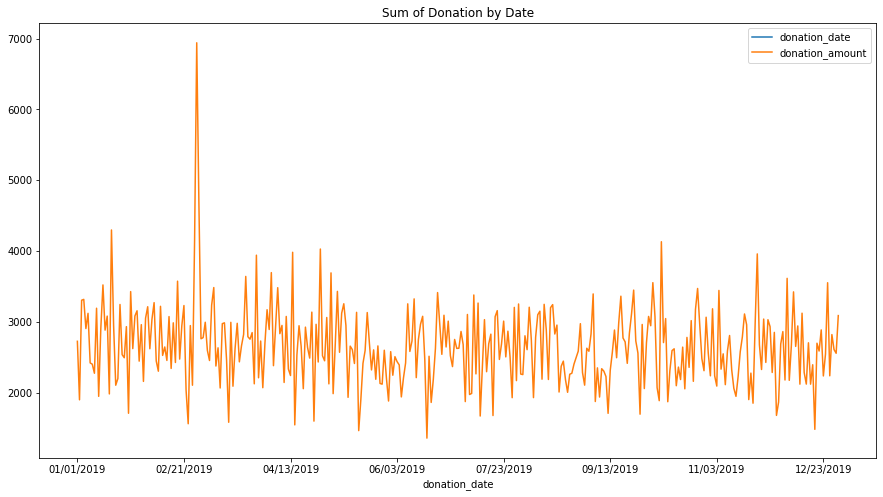

In [32]:
# Question 2
# The first graph looks no seasonal effect but at the end of February has a hight amount. 
# However, compare with the second graph, the average of February has no clearly increase.
# At the end of year has no clearly increase pattern.

df = pd.DataFrame(d, columns=['donation_date','donation_amount'])
df.plot(figsize=(15,8))
plt.title('Sum of Donation by Date')

In [33]:
dm = donation.groupby(['donation_date']).mean()
dm.nlargest(1, columns = 'donation_amount')

,donation_amount
donation_date,
01/26/2019,100.794118


Text(0.5, 1.0, 'Average Donation by Date')

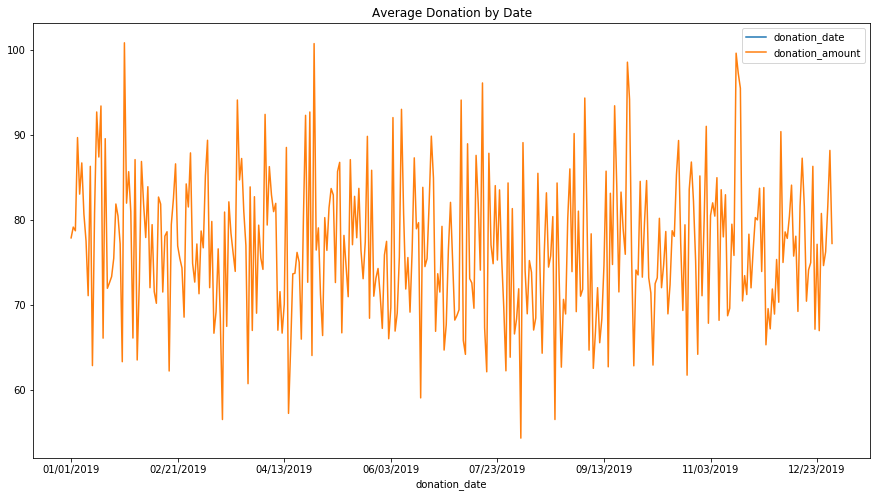

In [34]:
df2 = pd.DataFrame(dm, columns=['donation_date','donation_amount'])
df2.plot(figsize=(15,8))
plt.title('Average Donation by Date')

In [ ]:
# Question 3
# Based on the last graph, the Age_level 1 and 2 have high number of voters 
# but Age_level 3, 4 and 5 have low number of voters
# That means teenager and young people are warm to join the vote but middle-aged people does not.

donation['Age'] ='NULL'

for i in range(len(donation['birthdate'])):
    donation['Age'][i] = donation['birthdate'].str.split('/')[i][2]

In [ ]:
from datetime import datetime
n = datetime.today().strftime('%Y')

for i in range(len(donation['birthdate'])):
    donation['Age'][i] = int(n)-int(donation['Age'][i])

In [ ]:
donation.head()

In [ ]:
donation['Age_level'] ='NULL'

for i in range(len(donation['Age'])):
    if donation['Age'][i] in range(0,18):
        donation['Age_level'][i] = 0
    elif donation['Age'][i] in range(18,26):
        donation['Age_level'][i] = 1
    elif donation['Age'][i] in range(26,36):
        donation['Age_level'][i] = 2
    elif donation['Age'][i] in range(36,46):
        donation['Age_level'][i] = 3
    elif donation['Age'][i] in range(46,51):
        donation['Age_level'][i] = 4
    elif donation['Age'][i] in range(51,56):
        donation['Age_level'][i] = 5
    elif donation['Age'][i] in range(56,120):
        donation['Age_level'][i] = 6

In [ ]:
donation.head()

In [ ]:
import seaborn as sns
fig, axs = plt.subplots(figsize=(8,5))

sns.set(style="darkgrid")
ax = sns.countplot(x="Age_level", data=donation)

In [ ]:
# Question 4
# The young voters are more likely to provide email addresses and most of them did
# The old voters just half and half

donation['email_null'] ='NULL'

for i in range(len(donation['email'])):
    if donation.email.isna()[i] == True:
        donation['email_null'][i] = 1
    else:
        donation['email_null'][i] = 0

In [ ]:
donation.head()

In [ ]:
sns.set(style="ticks", color_codes=True)
fig, axs = plt.subplots(figsize=(8,5))

sns.countplot(x="Age_level", hue="email_null", data=donation, palette="Paired")
fig.tight_layout()

In [ ]:
# Question 5